Implement stupid decision tree over fited

ref:

https://towardsdatascience.com/implementing-a-decision-tree-from-scratch-f5358ff9c4bb/

https://mlcourse.ai/book/topic03/topic03_decision_trees_kNN.html

https://www.youtube.com/watch?v=NxEHSAfFlK8&list=PLcWfeUsAys2k_xub3mHks85sBHZvg24Jd&index=5

https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/supervised_learning/decision_tree.py

In [1]:
import random
from collections import Counter


In [2]:
from sklearn.datasets import load_breast_cancer


In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
import pandas as pd

df = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
df["mean area"].unique()

array([1001. , 1326. , 1203. ,  386.1, 1297. ,  477.1, 1040. ,  577.9,
        519.8,  475.9,  797.8,  781. , 1123. ,  782.7,  578.3,  658.8,
        684.5,  798.8, 1260. ,  566.3,  520. ,  273.9,  704.4, 1404. ,
        904.6,  912.7,  644.8, 1094. ,  732.4,  955.1, 1088. ,  440.6,
        899.3, 1162. ,  807.2,  869.5,  633. ,  523.8,  698.8,  559.2,
        563. ,  371.1, 1104. ,  545.2,  531.5, 1076. ,  201.9,  534.6,
        449.3,  561. ,  427.9,  571.8,  437.6, 1033. ,  712.8,  409. ,
       1152. ,  656.9,  527.2,  224.5,  311.9,  221.8,  645.7,  260.9,
        499. ,  668.3,  269.4,  394.1,  250.5,  502.5, 1130. ,  244. ,
        929.4,  584.1,  470.9,  817.7, 1006. , 1245. ,  506.3,  401.5,
       1878. , 1132. ,  443.3, 1075. ,  648.2,  466.1,  651.9,  662.7,
        728.2,  551.7,  555.1,  705.6, 1264. ,  451.1,  294.5,  412.6,
        642.5,  582.7,  143.5,  458.7,  298.3,  336.1,  530.2,  412.5,
        466.7, 1509. ,  396.5,  290.2,  480.4,  629.9,  334.2,  230.9,
      

In [7]:
aaaaaaa

NameError: name 'aaaaaaa' is not defined

In [ ]:
balls = {idx: ball for idx, ball in zip(range(20),  random.choices([0,1], [30,70], k=20))}


where 
 is the probability of finding the system in the 
-th state. This is a very important concept used in physics, information theory, and other areas. Entropy can be described as the degree of chaos in the system. The higher the entropy, the less ordered the system and vice versa. This will help us formalize “effective data splitting”

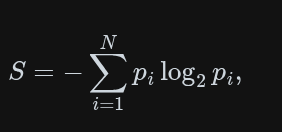

In [ ]:
import math

In [ ]:
def entropy(balls):

    len_balls = len(balls)
    if len_balls == 0:
        return 0
    counts = Counter(balls.values())
    entropy_value = 0
    for ball, count in counts.items():
        p = count / len_balls
        entropy_value -= p * math.log2(p)
    return entropy_value

In [ ]:
circle_colors = {
    0: "O",
    1: "B",
    2: "B",
    3: "B",
    4: "B",
    5: "O",
    6: "O",
    7: "O",
    8: "O",
    9: "B",
    10: "B",
    11: "B",
    12: "B",
    13: "O",
    14: "O",
    15: "O",
    16: "O",
    17: "O",
    18: "O",
    19: "B",
}


In [ ]:
entropy(circle_colors)

0.9927744539878083

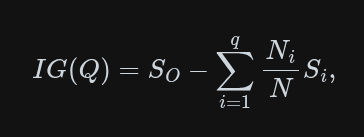

In [ ]:
def split_dict(dictionary, index):
    """
    Splits a dictionary into two parts based on the index.
    """
    return {k: v for k, v in dictionary.items() if k <= index}, \
           {k: v for k, v in dictionary.items() if k > index}

In [ ]:
left, right = split_dict(circle_colors, 12)

In [ ]:
Counter(left.values(

)).items()

dict_items([('O', 5), ('B', 8)])

In [ ]:
entropy(split_dict(circle_colors, 12)[0])

0.9612366047228759

In [ ]:
entropy(split_dict(circle_colors, 12)[1])

0.5916727785823275

In [ ]:
def information_gain(balls, condition):
    total_entropy = entropy(balls)
    len_balls = len(balls)
    s = 0
    for subset in split_dict(balls, condition):
        weight = len(subset) / len_balls
        subset_entropy = entropy(subset)
        s += weight * subset_entropy
    return total_entropy - s


In [17]:
30 - (10 + 10 )

10

In [18]:
soma = 30
for i in [10,10]:
    soma -= i


In [19]:
soma

10

In [ ]:
information_gain(circle_colors, 12)

0.16088518841412436

In [1]:
import numpy as np

In [4]:
x = np.array([5,2,3,4,5])

In [15]:
a = np.where(x>3)[0]

In [16]:
import numpy as np
import time

a = np.random.rand(1_000_000)
cond = a > 0.9

start = time.time()
_ = np.where(cond)[0]
print("np.where:", time.time() - start)

start = time.time()
_ = np.argwhere(cond).flatten()
print("np.argwhere.flatten:", time.time() - start)


np.where: 0.003632068634033203
np.argwhere.flatten: 0.00535130500793457


In [ ]:
def find_best_criterion(balls:dict):
    criterios = {}
    try:
        for i in list(balls.keys())[:-1]:
            criterios[i] = information_gain(balls, i)

        return min(criterios, key=criterios.get)
    except Exception as e:
        print(f"Error finding best criterion: {e}")
        return None

In [ ]:
def get_best_criterion(balls:dict):
    criterios = {}
    try:
        for i in list(balls.keys())[1:-1]:
            criterios[i] = information_gain(balls, i)

        return criterios
    except Exception as e:
        print(f"Error finding best criterion: {e}")
        return None

In [ ]:
class TreeNode:
    def __init__(self, value, dataset):
        self.value = value
        self.dataset = dataset
        self.children = []
    def add_child(self, child):
        self.children.append(child)
    
    def __repr__(self):
        return f"{self.value}"

    def print_tree(self, level=0):
        indent = "  " * level
        print(f"{indent}{self.value}")
        for child in self.children:
            child.print_tree(level + 1)


In [ ]:
tree = TreeNode(find_best_criterion(circle_colors), circle_colors)

In [ ]:
tree

8

In [ ]:
left, right = split_dict(tree.dataset, tree.value)

left_node = TreeNode(find_best_criterion(left), left)
right_node = TreeNode(find_best_criterion(right), right)
tree.add_child(left_node)
tree.add_child(right_node)

In [ ]:
for child in tree.children:
    nodes_to_split = [child]
    while nodes_to_split:
        current_node = nodes_to_split.pop(0)
        if current_node.value is None or not current_node.dataset:
            continue
        left, right = split_dict(current_node.dataset, current_node.value)
        left_criterion = find_best_criterion(left)
        right_criterion = find_best_criterion(right)
        if left and left_criterion is not None:
            left_node = TreeNode(left_criterion, left)
            current_node.add_child(left_node)
            nodes_to_split.append(left_node)
        if right and right_criterion is not None:
            right_node = TreeNode(right_criterion, right)
            current_node.add_child(right_node)
            nodes_to_split.append(right_node)
    

Error finding best criterion: min() arg is an empty sequence
Error finding best criterion: min() arg is an empty sequence
Error finding best criterion: min() arg is an empty sequence
Error finding best criterion: min() arg is an empty sequence
Error finding best criterion: min() arg is an empty sequence
Error finding best criterion: min() arg is an empty sequence
Error finding best criterion: min() arg is an empty sequence
Error finding best criterion: min() arg is an empty sequence
Error finding best criterion: min() arg is an empty sequence
Error finding best criterion: min() arg is an empty sequence
Error finding best criterion: min() arg is an empty sequence
Error finding best criterion: min() arg is an empty sequence
Error finding best criterion: min() arg is an empty sequence
Error finding best criterion: min() arg is an empty sequence
Error finding best criterion: min() arg is an empty sequence
Error finding best criterion: min() arg is an empty sequence
Error finding best crite

In [ ]:
print(tree.children[1].children[0].dataset), 
tree.children[1].children[0].value

{9: 'B', 10: 'B', 11: 'B', 12: 'B', 13: 'O', 14: 'O', 15: 'O', 16: 'O', 17: 'O'}


16

In [ ]:
find_best_criterion(tree.children[1].children[0].dataset)

16

In [ ]:
get_best_criterion(tree.children[1].children[0].dataset)

{10: 0.31976006206417584,
 11: 0.5577277787393196,
 12: 0.9910760598382222,
 13: 0.5900048960119098,
 14: 0.3788788371352292,
 15: 0.2247875095893599,
 16: 0.10218717094933338}

In [ ]:
tree.children[1].children[0].dataset

{9: 'B',
 10: 'B',
 11: 'B',
 12: 'B',
 13: 'O',
 14: 'O',
 15: 'O',
 16: 'O',
 17: 'O'}

In [ ]:
tree.children[1].children[0].children[0].dataset

{9: 'B', 10: 'B', 11: 'B', 12: 'B', 13: 'O', 14: 'O', 15: 'O', 16: 'O'}

In [ ]:
find_best_criterion(left)

Error finding best criterion: min() arg is an empty sequence


In [ ]:
tree.print_tree()

8
  1
    0
    7
      2
        6
          3
            5
              4
  17
    16
      9
        15
          10
            14
              11
                13
                  12
    18


In [ ]:
from sklearn.datasets import fetch_california_housing

houses_data = fetch_california_housing()

In [ ]:
houses =  pd.DataFrame(data=houses_data.data, columns=houses_data.feature_names)
houses['target'] = houses_data.target
houses.head(20)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [ ]:

matrix_house = houses.values

In [ ]:
train_split = int(len(matrix_house) * 0.8)

In [ ]:
predict_train = matrix_house[:train_split, -1]
matrix_house_train = matrix_house[:train_split, :-1]
predict_test = matrix_house[train_split:, -1]
matrix_house_test = matrix_house[train_split:, :-1]


In [ ]:
import numpy as np

In [ ]:
np.quantile(matrix_house_train, 0.2)

np.float64(1.0650826446280992)

In [ ]:
matrix_house_train[:, 1]

array([41., 21., 52., ..., 22.,  7., 22.], shape=(16512,))

In [ ]:
#An Introduction to Statistical Learning

In [ ]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf(self):
        return self.data is not None

In [ ]:
class DecisionTreeRegression:
    def __init__(self, data=None, alpha=1e-6, epochs=100, lr=0.01):
        self.epochs = epochs
        self.lr = lr
        self.data = data
        self.alpha = alpha
        self.nodes = []

    def cost_complexity_pruning(self, x, y):
        return ((y, self.predict(x)) ** 2) * (self.alpha * len(self.nodes))

    def predict(self, x):
        pass

    def numerical_split(self, x, feature, threshold, y, return_x=False):
        """
        Returns (right_y, left_y)
        """
        mask = x[:, feature] >= threshold
        if return_x:
            right = x[mask], y[mask]
            left = x[mask], y[~mask]
        else:
            right = y[mask]
            left = y[~mask]
        return right, left

    def compute_loss(self, x, feature, threshold, y):
        right, left = self.numerical_split(x, feature, threshold, y)
        if len(right) == 0 or len(left) == 0:
            return float("inf")
        right_mean = np.mean(right, axis=0)
        left_mean = np.mean(left, axis=0)
        metric_right = np.sum((right - right_mean) ** 2)
        metric_left = np.sum((left - left_mean) ** 2)
        return metric_right + metric_left

    def compute_gradient(self, x, feature, threshold, y):
        # Central difference
        loss1 = self.compute_loss(x, feature, threshold - self.alpha, y)
        loss2 = self.compute_loss(x, feature, threshold + self.alpha, y)
        return (loss2 - loss1) / (2 * self.alpha)

    def best_numerical_split(self, x, feature, y):
        threshold = float(np.mean(x[:, feature]))
        for _ in range(self.epochs):
            grad = self.compute_gradient(x, feature, threshold, y)
            threshold -= self.lr * grad
        return float(threshold)

    def build_tree(self, x, y):
        # Base case: if y is pure or too small, return a leaf
        if len(set(y)) == 1 or len(y) <= 1:
            return Node(
                feature=None, threshold=None, left=None, right=None, value=np.mean(y)
            )

        num_samples, num_features = x.shape
        best_feature = None
        best_threshold = None
        best_score = float("inf")

        for feature in range(num_features):
            threshold = self.best_numerical_split(x, feature, y)
            loss = self.compute_loss(x, feature, threshold, y)

            if loss < best_score:
                best_score = loss
                best_feature = feature
                best_threshold = threshold

        if best_feature is None:
            return Node(
                feature=None, threshold=None, left=None, right=None, value=np.mean(y)
            )

        # Split data
        mask = x[:, best_feature] >= best_threshold
        right_x, right_y = x[mask], y[mask]
        left_x, left_y = x[~mask], y[~mask]

        # If split leads to empty child (shouldn't happen), return a leaf
        if len(left_y) == 0 or len(right_y) == 0:
            return Node(
                feature=None, threshold=None, left=None, right=None, value=np.mean(y)
            )

        # Recursively build subtrees
        left_node = self.build_tree(left_x, left_y)
        right_node = self.build_tree(right_x, right_y)

        return Node(
            feature=best_feature,
            threshold=best_threshold,
            left=left_node,
            right=right_node,
            value=None,
        )


In [ ]:
matrix_house_train.shape

(16512, 8)

In [ ]:
decision = DecisionTreeRegression()


In [ ]:
test = decision.build_tree(matrix_house_train, predict_train)

In [ ]:
test.feature, test.threshold

(0, 3.8004513263081394)

In [ ]:
test.left.feature, test.left.threshold, test.right.feature, test.right.threshold

(0, 2.627749834505585, 0, 5.457037828755114)